## <font color = 'darkblue'> **Sequência para chegar no melhor modelo**

1) **Feito uma grande Análise Exploratória**

2) Avaliando os dados geográficos com Geopandas

3) Desenvolvido notebook para o projeto de Machine Learning, com funções que podem facilitar testes de diferentes modelos

4) Aprimorar o modelo de Machine Learning, seguindo as etapas abaixo:
    - Linear Regression com preprocessamento só colunas categóricas, comparando com Dummy Regressor
    - Avaliado se a transformação de target melhorava modelo, e testado qual transformação de target era melhor (PowerTransform ou Quantile Transform)
    - Testado diferentes preprocessamento para colunas numéricas (só RobustScaler ou Standard Scaler + Power Transform) com a melhor transformação de target anterior
    - Aplicado Polynomial Features para verifical qual grau do modelo ficava melhor, apenas com Robust Scaler para colunas numéricas e QuantileTransform para o target
    - Substituído o Linear Regression pelo Elastic Net para verificar se alguma regularização melhorava o modelo
    - Substituído o ElasticNet pelo Ridge para verificar os resultado, definindo finalmente o melhor modelo

5) Salvar o melhor modelo

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_ORIGINAIS, PASTA_RELATORIOS
from src.graficos import PALETTE

sns.set_theme(palette="bright")

In [4]:
df = pd.read_csv(DADOS_ORIGINAIS, compression="zip")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(exclude="number")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [39]:
#sns.pairplot(df, diag_kind='kde', plot_kws=dict(alpha=0.5))    #---> Deixado sem executar apenas para reeduzir tamanho do arquivo .ipynb

<font color='blue'> **OBS**: Repare que a ultima linha (median_house_value) tem vários pontos concentrados no topo do gráfico (valor de 500.000). O mesmo se repete pro gráfico de median_income. Me parece que vários valores superiores a 500000 foram cortados para ficar nesse valor máximo, e aí os pontos estão se concentrando nesse valor, tornando esse máximo meio artificial. Isso pode ser um problema para os modelos de machine learning que vamos construir.

#### **Métricas de assimetria dos dados**

In [11]:
df.select_dtypes('number').skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [12]:
df.select_dtypes('number').kurtosis()

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64

#### **Analisando valores duplicados**

In [13]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


#### **Analisando valores nulos**

In [14]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [15]:
df[df.isnull().any(axis=1)].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


**OBS**: Me parece não existir nenhum padrão nos valores nulos acima (avalaiando pelo índice vemos que não são linhas contínuas, nem regiões contínuas de longitude e latitude, e nem em relação à proximidade com o oceado).

#### **Analisando colunas categóricas**

In [16]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**OBS**: veja que só temos 5 valores ISLAND. Talvez tenhamos que tomar alguma decisão com esses dados, pois são pouquíssimos registros, e podem atrapalhar na geração dos modelos de machine learning.

#### **Analisando colunas numéricas**

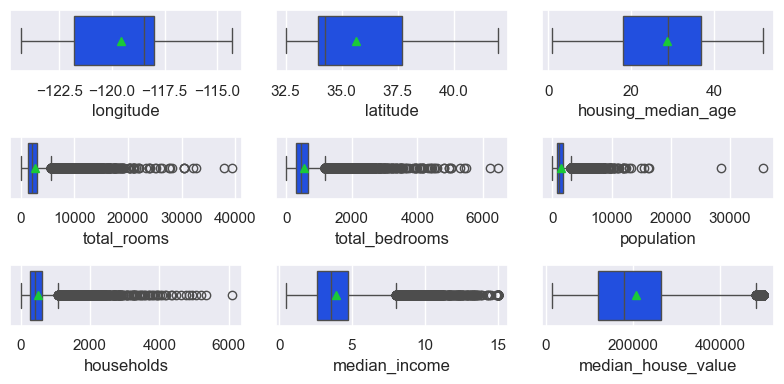

In [17]:
fig, axs = plt.subplots(3,3, figsize=(8, 4))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax= ax, showmeans=True)

plt.tight_layout()

plt.show()

In [18]:
df.select_dtypes('number').corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


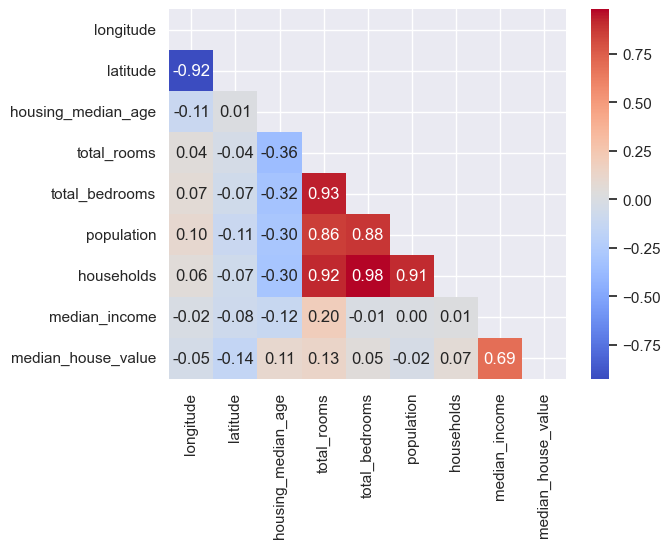

In [19]:
matriz = np.triu(df.select_dtypes('number').corr())

fig, ax = plt.subplots()

sns.heatmap(
    df.select_dtypes('number').corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE
)

plt.show()

<font color = 'blue'> **OBS**: Veja que pro nosso target desse projeto (median_house_value) a unica feature que tem uma correlação alta é median_income. Talvez ela possa ser um problema para alguns modelos, que podem considerar apenas essa feature como para prever os resultados. Será que devemos criar outras features para contornar esse problema?

**OBS2**: Outra consideraçõa importante é que a alta correlação existe entre total_bedrooms, population e households. Isso pode indicar uma multicolinearidade, a informação que uma feature fornece a outra também. Será que precisamos dessas 3 features? Ou somente alguma delas?

**OBS3**: A título de curiosidade, percebemos a correlação negativa existente entre housing_median_age e total_rooms, total_bedrooms, population e households. Isso indica que quanto mais velha a casa, menores quartos / camas / hospedes temos. Talvez no decorrer do tempo o tamanho das residências foi diminuindo.

#### **Estratégias para criar novas colunas**

**Algumas variáveis novas:**

- Criar classe em 'median_income'
- Cômodos por domicílio
- Pessoas por domicílio
- Quartos por cômodos


##### **Criando colunas categóricas**

In [20]:
df['median_income_cat'] = pd.cut(
    df['median_income'],
    bins = [0, 1.5, 3, 4.5, 6, np.inf],
    labels = [1, 2, 3, 4, 5]
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  median_income_cat   20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df['median_income_cat'].value_counts().sort_index()

median_income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

##### **Criando colunas numéricas**

- Cômodos por domicílio
- Pessoas por domicílio
- Quartos por cômodos

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_cat'],
      dtype='object')

In [23]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  median_income_cat         20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
 13  bedrooms_per_room         20433 non-null  floa

#### **Analisando impacto das novas colunas**

In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


**OBS:** Veja que temos valores muito grandes para o máximo de rooms_per_household (141) e population_per_houselhold (1243) indicando que talvez tenhamos estabelecimentos comerciais como hotéis nessa base de dados que abrigam várias pessoas. Até o bedrooms_per_room indica isso, pois é um comodo com apenas 1 quarto (como em hotéis). Em casas, essa relação é pra ser menor do que 1, pois alem do quarto tem banheiro, cozinha, sala, etc.

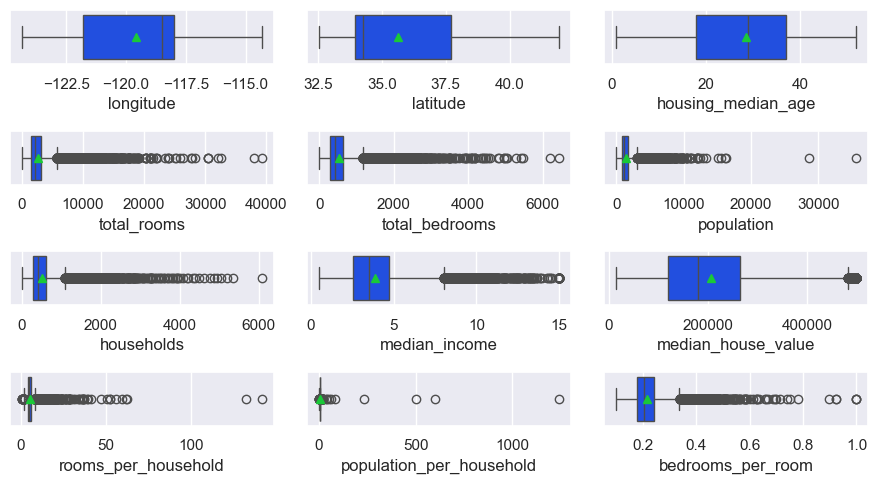

In [25]:
fig, axs = plt.subplots(4,3, figsize=(9, 5))

for ax, coluna in zip(axs.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(data=df, x=coluna, ax= ax, showmeans=True)

plt.tight_layout()

plt.show()

**OBS**: Agora fica ainda mais notável os outliers nessas colunas numéricas criadas

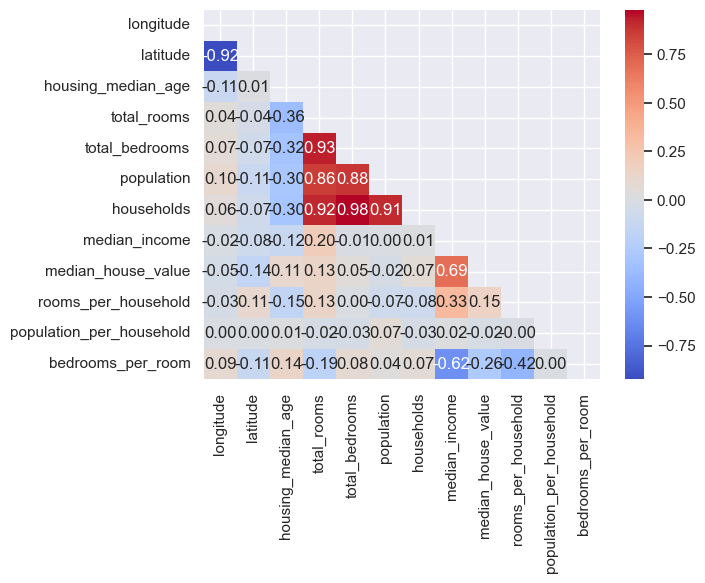

In [26]:
matriz = np.triu(df.select_dtypes('number').corr())

fig, ax = plt.subplots()

sns.heatmap(
    df.select_dtypes('number').corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE
)

plt.show()

<font color = 'blue'> **OBS:** Agora temos outras colunas que possuem uma correlação alta com median_house_value que é o nosso target. Veja que a correlação de median_house_value com rooms_per_household é de 0.15 e com beedrooms_per_room é de -0.26. São 2 features que criamos com correlações maiores que as demais, que podem ajudar no modelo de machine learning.

#### **Analisando outras peculiaridades da base de dados**

In [27]:
df[ df['median_house_value'] == df['median_house_value'].max()] 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,1,2.929412,4.658824,0.313253
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,1,2.436000,5.396000,0.387521
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,5,7.794393,2.415888,0.134892
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,5,7.512097,2.754032,0.127214
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,5,8.282548,2.623269,0.126756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,4,6.958333,2.666667,0.174983
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,5,9.890756,3.487395,0.117247
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,5,7.236059,2.553439,0.142692
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,5,9.873315,3.177898,0.111657


<font color = 'blue'> **OBS:** Temos 965 registros onde o target (median_house_value) possui valores igual ao valor máximo (representa 4,6% da base). Isso pode impactar os modelos que serão criados

In [28]:
df[ df['median_house_value'] == df['median_house_value'].max()].shape[0] / df.shape[0]

0.04675387596899225

In [29]:
df[ df['median_house_value'] == df['median_house_value'].min()]          # Para os valores igual ao mínimo são poucos dados, não deve ser um problema

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND,2,6.710526,2.236842,0.286275
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND,2,3.774390,2.987805,0.386107
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND,3,3.568889,2.791111,0.332503
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND,1,12.250000,2.250000,0.285714


In [30]:
print(df['median_house_value'].quantile(0.99))
print(df['median_house_value'].quantile(0.98))
print(df['median_house_value'].quantile(0.97))
print(df['median_house_value'].quantile(0.96))
print(df['median_house_value'].quantile(0.95))

500001.0
500001.0
500001.0
500001.0
489809.9999999999


<font color = 'blue'> **OBS:** Veja que os valores iguais ou acima do quantil 0.96 o median_house_value parece ter sido ajustado para o valor máximo 500001.0. Isso parece ter sido feito um ajuste manual dos dados, e podemos adotar esse quantil como uma estratégia de reduzir / tratar os dados / outliers

#### **Tratamento da base dos dados**

In [31]:
df_clean = df.copy()

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  median_income_cat         20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
 13  bedrooms_per_room         20433 non-null  floa

In [32]:
QUANTIL = 0.99

df_clean = df_clean[
    (df['housing_median_age'] < df['housing_median_age'].quantile(QUANTIL)) &
    (df['total_rooms'] < df['total_rooms'].quantile(QUANTIL)) & 
    (df['total_bedrooms'] < df['total_bedrooms'].quantile(QUANTIL)) &
    (df['population'] < df['population'].quantile(QUANTIL)) &
    (df['households'] < df['households'].quantile(QUANTIL)) &
    (df['median_income'] < df['median_income'].quantile(QUANTIL)) &
    (df['median_house_value'] < df['median_house_value'].quantile(QUANTIL)) &
    (df['rooms_per_household'] < df['rooms_per_household'].quantile(QUANTIL)) &
    (df['population_per_household'] < df['population_per_household'].quantile(QUANTIL)) &
    (df['bedrooms_per_room'] < df['bedrooms_per_room'].quantile(QUANTIL))
]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17566 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17566 non-null  float64 
 1   latitude                  17566 non-null  float64 
 2   housing_median_age        17566 non-null  float64 
 3   total_rooms               17566 non-null  float64 
 4   total_bedrooms            17566 non-null  float64 
 5   population                17566 non-null  float64 
 6   households                17566 non-null  float64 
 7   median_income             17566 non-null  float64 
 8   median_house_value        17566 non-null  float64 
 9   ocean_proximity           17566 non-null  object  
 10  median_income_cat         17566 non-null  category
 11  rooms_per_household       17566 non-null  float64 
 12  population_per_household  17566 non-null  float64 
 13  bedrooms_per_room         17566 non-null  float64 


In [33]:
1 - df_clean.shape[0]/df.shape[0]

0.14893410852713174

In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


**OBS**: Comparando a base original e a base tratada (df_clean) podemos observar que os valores máximos reduziram bastante, parece que alguns outliers já foram tratados

In [35]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000
mean,-119.509858,35.601950,27.276955,2510.361152,515.361209,1386.223557,483.953034,3.696453,189591.204486,5.253849,2.934597,0.211654
std,1.984173,2.147246,11.323320,1593.957111,320.838680,844.886263,295.554440,1.541904,95988.907554,1.134053,0.691400,0.048323
min,-124.300000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.714286,0.750000,0.113535
25%,-121.600000,33.920000,18.000000,1464.250000,300.000000,816.000000,287.000000,2.547325,114300.000000,4.446441,2.470168,0.176919
50%,-118.460000,34.240000,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,5.205218,2.852579,0.203474
75%,-117.980000,37.670000,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622150,243800.000000,5.960973,3.306344,0.239171
max,-114.550000,41.950000,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,10.352941,5.392954,0.406295


#### **Verificando o impacto do tratamento das colunas numéricas**

In [38]:
#sns.pairplot(df_clean, diag_kind='kde', plot_kws=dict(alpha=0.2))   #---> Deixado sem executar apenas para reeduzir tamanho do arquivo .ipynb

<font color = 'blue'> **Observações**: 
- Podemos observar uma distribuição muito mais "normal" nos gráficos da diagonal. As curvas continuam assimétricas, mas muito menos do que antes, resultado da eliminação de 1% dos valores mais altos de algumas colunas, eliminando parte dos outliers.
- Também não temos mais um pico no gráfico para housing_median_age (igual a 52) e para median_house_value (igual a 500001)
- Em alguns gráficos antes tinhamos muitos pontos concentrados no limite superior do eixo Y, o que foi eliminado tirando os maiores outliers

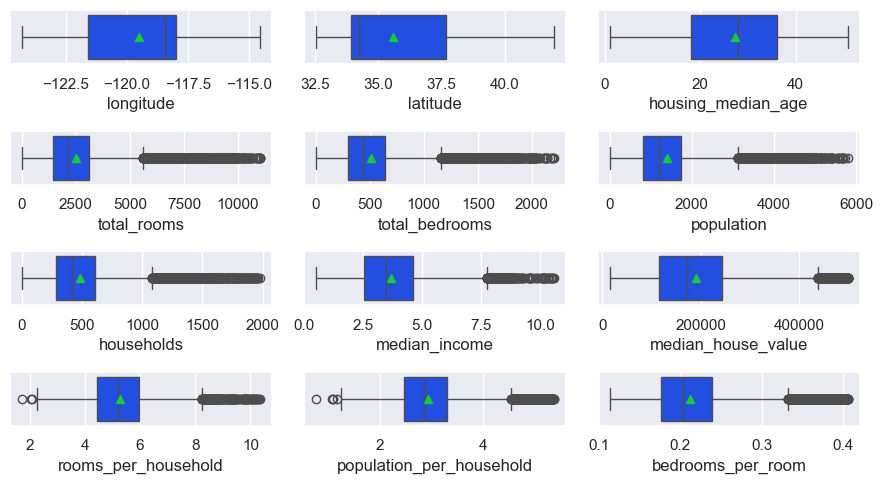

In [41]:
fig, axs = plt.subplots(4,3, figsize=(9, 5))

for ax, coluna in zip(axs.flatten(), df_clean.select_dtypes('number').columns):
    sns.boxplot(data=df_clean, x=coluna, ax= ax, showmeans=True)

plt.tight_layout()

plt.savefig(PASTA_RELATORIOS/"Boxplot das features do df tradado")

plt.show()

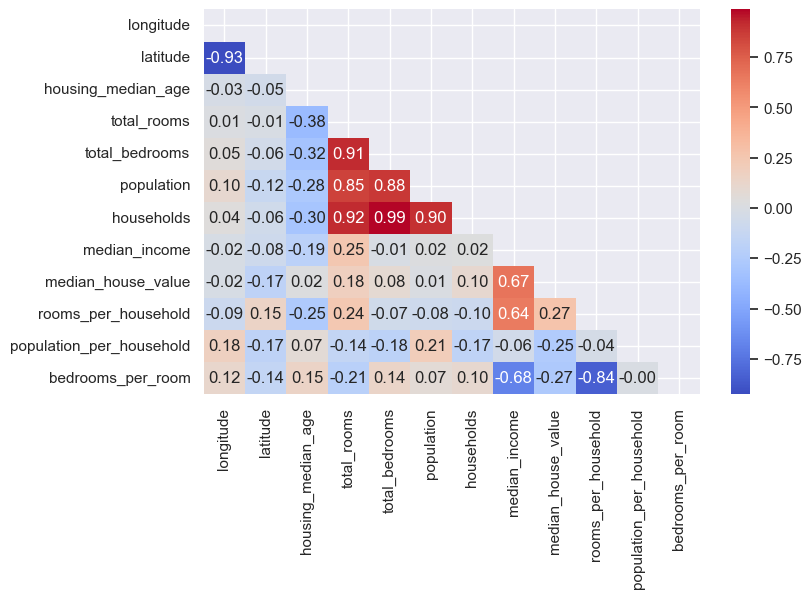

In [40]:
matriz = np.triu(df_clean.select_dtypes('number').corr())

fig, ax = plt.subplots(figsize=(8,5))

sns.heatmap(
    df_clean.select_dtypes('number').corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE
)

plt.savefig(PASTA_RELATORIOS/"Correlacao das features do df tradado")

plt.show()

<font color = 'blue'> **Mudanças nas correlações**:
- A correlação de 'housing_median_age' com 'median_house_value' (target) reduziu de 0.11 para 0.02
- A correlação de 'median_income' com 'median_house_value' (target) continua alta e alterou pouca coisa (0.67 para 0.69). O mesmo vale para 'bedroom_per_room'
- A correlação de 'rooms_per_household' com 'median_house_value' (target) aumentou de -0.15 para -0.27
- A correlação de 'population_per_household' com 'median_house_value' (target) aumentou muito, saindo de de -0.02 (quase nula) para -0.27 (uma das maiores)
- Antes a linha de correlações da coluna 'population_per_household' com as demais features era quase zerada, agora temos valores bem expressivos de correlação com as outras colunas
- Com tudo que fizemos (criação de colunas numéricas + eliminação do quartil 1% superior) fez com que tenhamos bem mais correlações das features com nosso target

#### **Tratamento das colunas categóricas**

In [ ]:
df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7889
INLAND        5935
NEAR OCEAN    2224
NEAR BAY      1516
ISLAND           2
Name: count, dtype: int64

**OBS: Vamos eliminar a categoria ISLAND, tem apenas 2 registros, não vale a pena mantê-la**

In [ ]:
df_clean = df_clean.loc[df_clean['ocean_proximity'] != 'ISLAND']

df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7889
INLAND        5935
NEAR OCEAN    2224
NEAR BAY      1516
Name: count, dtype: int64

#### **Otimizando os dados - Alterando o *'dtype'* de cada coluna**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17564 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float64 
 1   latitude                  17564 non-null  float64 
 2   housing_median_age        17564 non-null  float64 
 3   total_rooms               17564 non-null  float64 
 4   total_bedrooms            17564 non-null  float64 
 5   population                17564 non-null  float64 
 6   households                17564 non-null  float64 
 7   median_income             17564 non-null  float64 
 8   median_house_value        17564 non-null  float64 
 9   ocean_proximity           17564 non-null  object  
 10  median_income_cat         17564 non-null  category
 11  rooms_per_household       17564 non-null  float64 
 12  population_per_household  17564 non-null  float64 
 13  bedrooms_per_room         17564 non-null  float64 


**OBS: Vamos transformar a coluna "ocean_proximity" para categórica**

In [ ]:
df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17564 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float64 
 1   latitude                  17564 non-null  float64 
 2   housing_median_age        17564 non-null  float64 
 3   total_rooms               17564 non-null  float64 
 4   total_bedrooms            17564 non-null  float64 
 5   population                17564 non-null  float64 
 6   households                17564 non-null  float64 
 7   median_income             17564 non-null  float64 
 8   median_house_value        17564 non-null  float64 
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  category
 11  rooms_per_household       17564 non-null  float64 
 12  population_per_household  17564 non-null  float64 
 13  bedrooms_per_room         17564 non-null  float64 


C:\Users\brcprrcchave\AppData\Local\Temp\ipykernel_20272\1578887536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category')


**Transformando colunas 'float64' em valores inteiros**

In [ ]:
colunas_valores_inteiros = []

for coluna in df_clean.select_dtypes('number').columns:
    if df_clean[coluna].apply(float.is_integer).all():
        colunas_valores_inteiros.append(coluna)

colunas_valores_inteiros

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_house_value']

In [41]:
colunas_valores_float = []

for coluna in df_clean.select_dtypes('number'):
    if coluna not in colunas_valores_inteiros:
        colunas_valores_float.append(coluna)

colunas_valores_float

['longitude',
 'latitude',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_room']

In [ ]:
# Transformando o tipo da coluna

df_clean[colunas_valores_inteiros] = df_clean[colunas_valores_inteiros].apply(pd.to_numeric, downcast='integer')

df_clean[colunas_valores_float] = df_clean[colunas_valores_float].apply(pd.to_numeric, downcast='float')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17564 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  category
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  float32 


C:\Users\brcprrcchave\AppData\Local\Temp\ipykernel_20272\2088736754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[colunas_valores_inteiros] = df_clean[colunas_valores_inteiros].apply(pd.to_numeric, downcast='integer')
C:\Users\brcprrcchave\AppData\Local\Temp\ipykernel_20272\2088736754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[colunas_valores_float] = df_clean[colunas_valores_float].apply(pd.to_numeric, downcast='float')
